<a href="https://colab.research.google.com/github/AshSama12/Energy-Efficient/blob/master/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import  the zipfile
import zipfile
zip_file_path ='/content/drive/MyDrive/data mining/energy+efficiency.zip'

In [3]:
#unzip the file
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall('/content/energy_efficiency')

In [4]:
#load the dataset
import pandas as pd
excel_file_path ='/content/energy_efficiency/ENB2012_data.xlsx'

In [5]:
# Load the dataset into a DataFrame
data = pd.read_excel(excel_file_path)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# Step 4: Data Visualization, Distribution, and Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set up plot style
plt.style.use('seaborn-darkgrid')

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

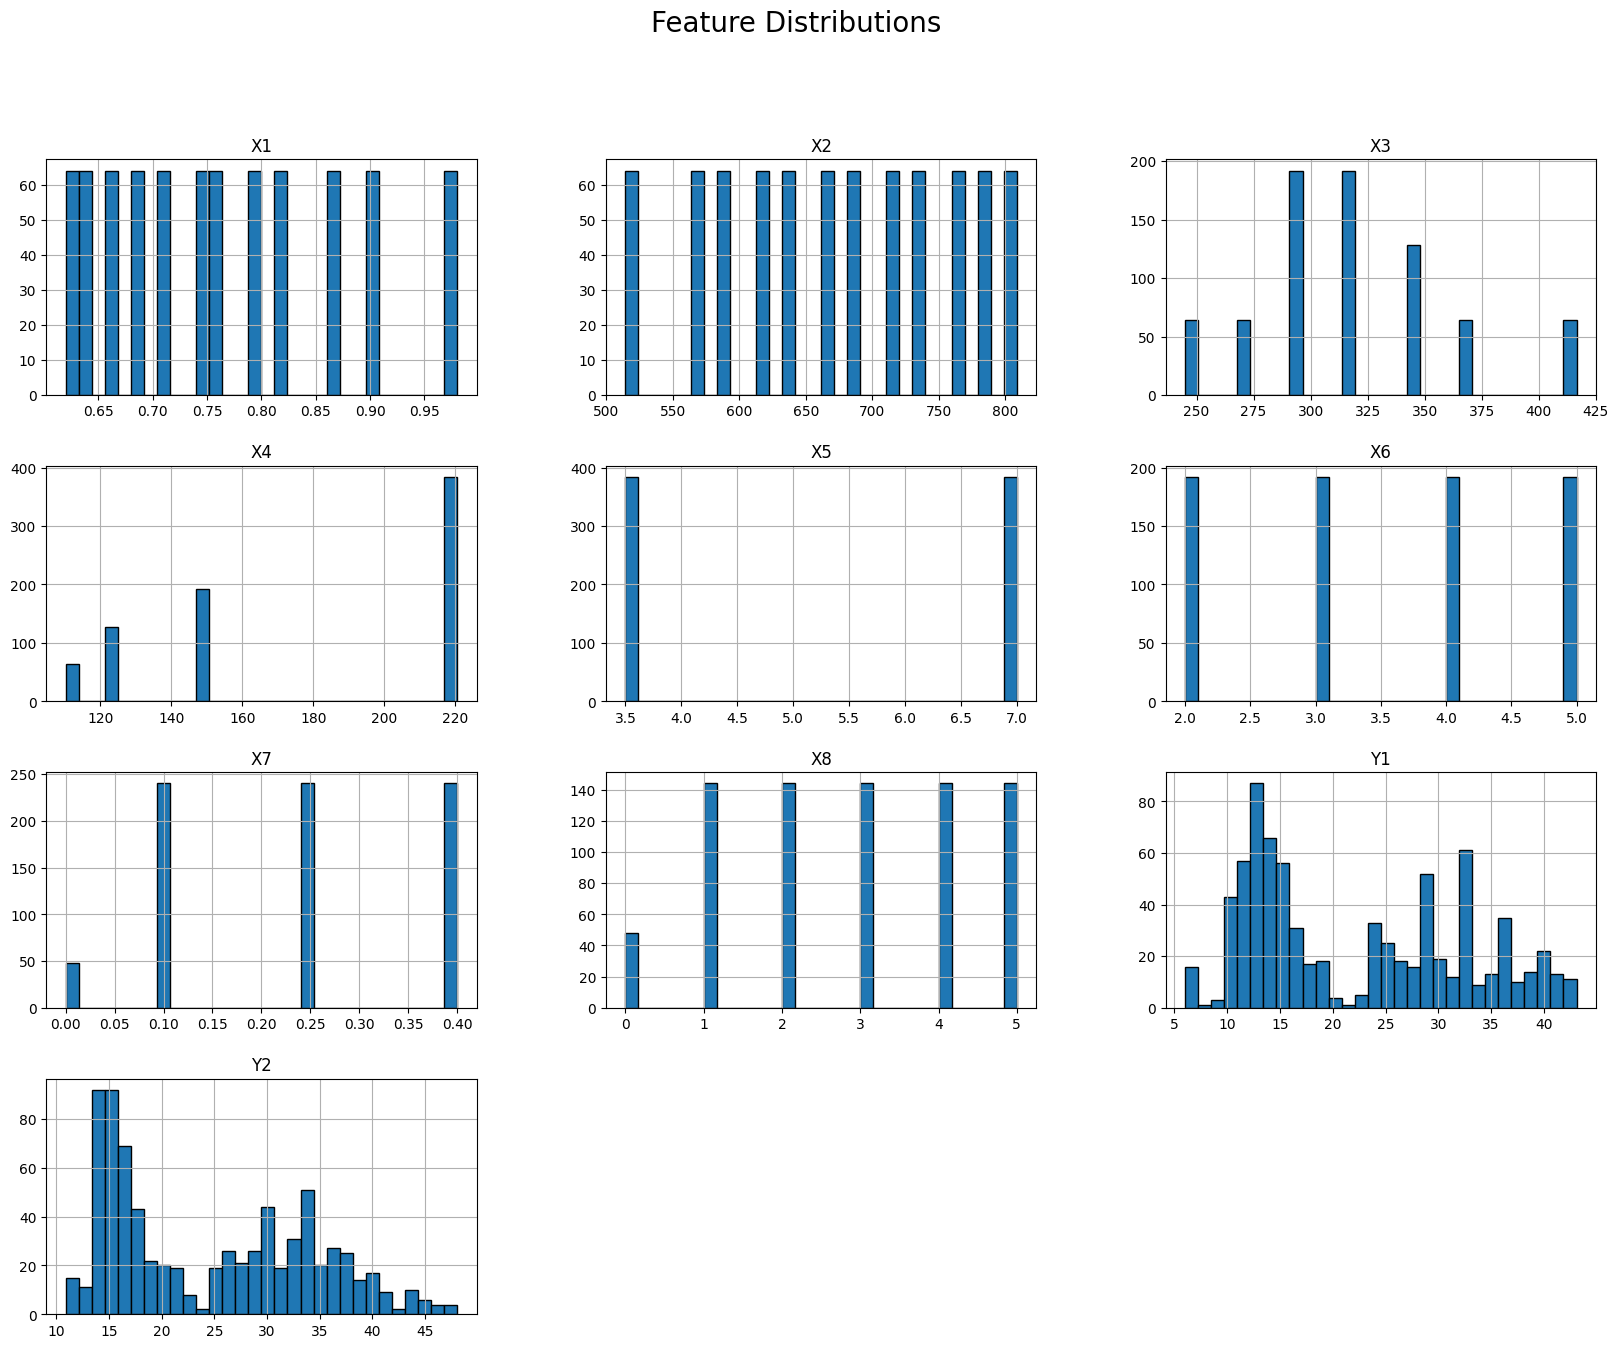

In [8]:
# 1. Distribution analysis (Histograms)
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

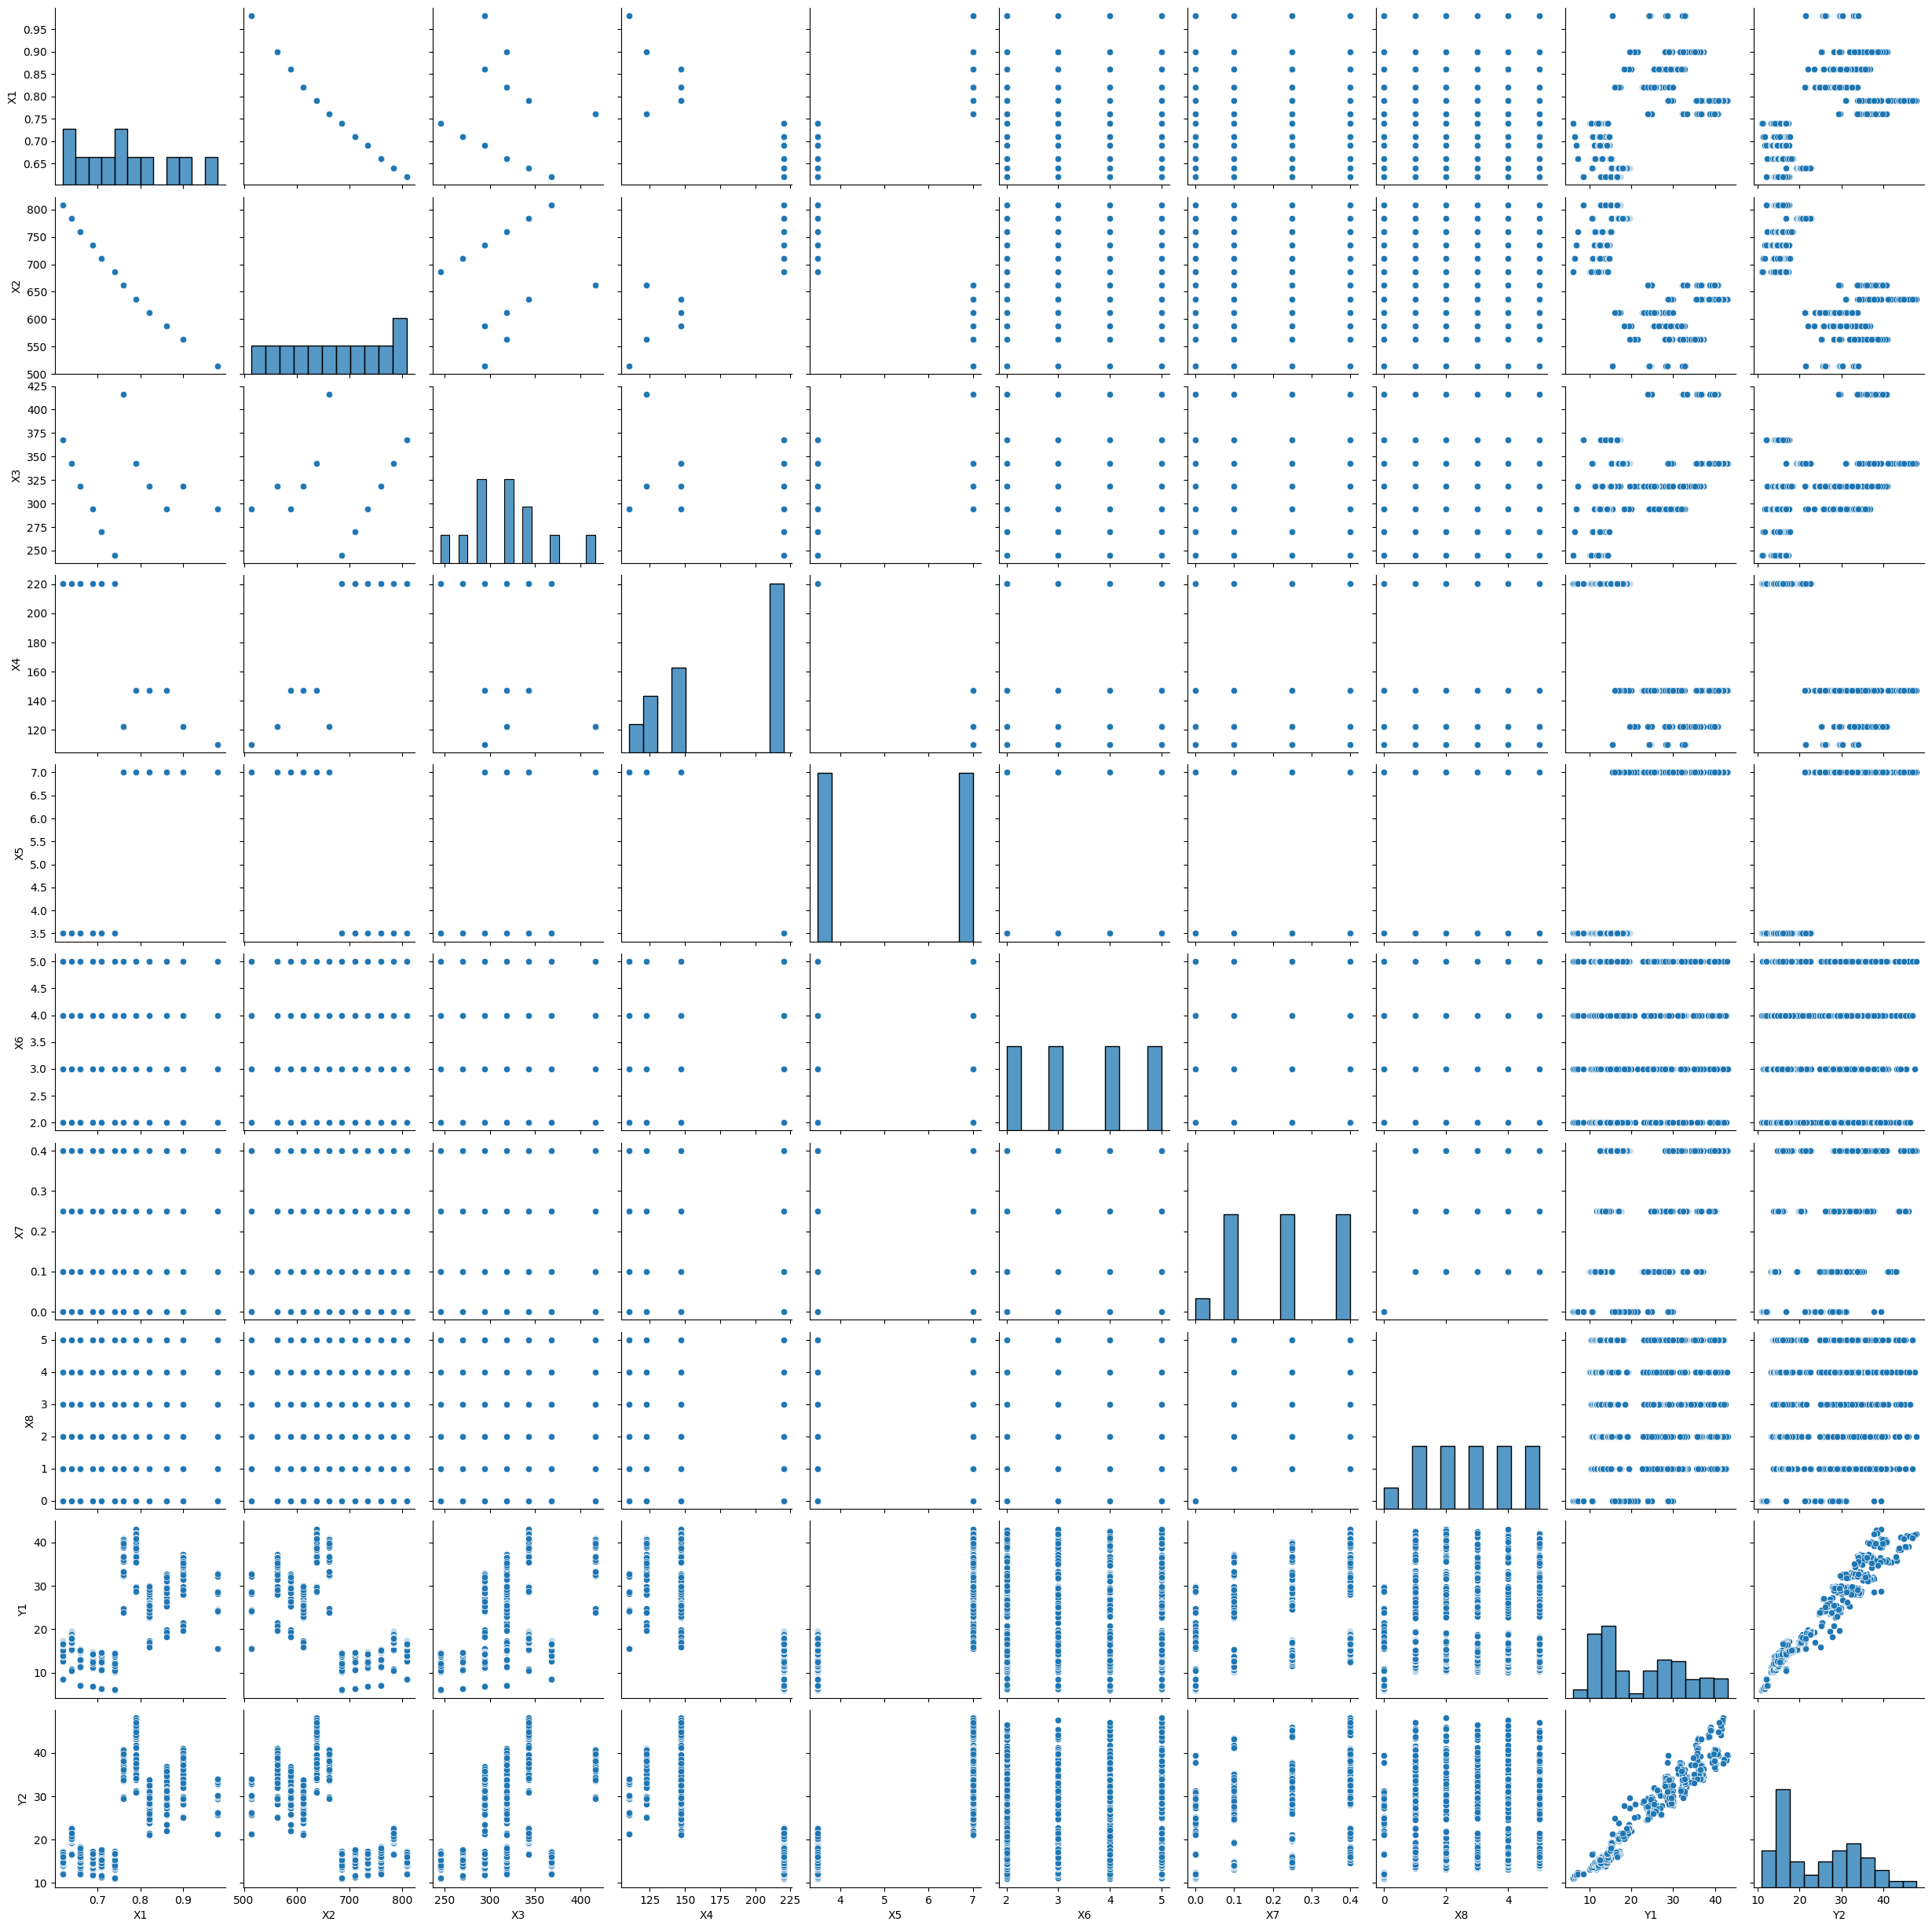

In [9]:
# 2. Pairplot for visualizing relationships
sns.pairplot(data)
plt.show()

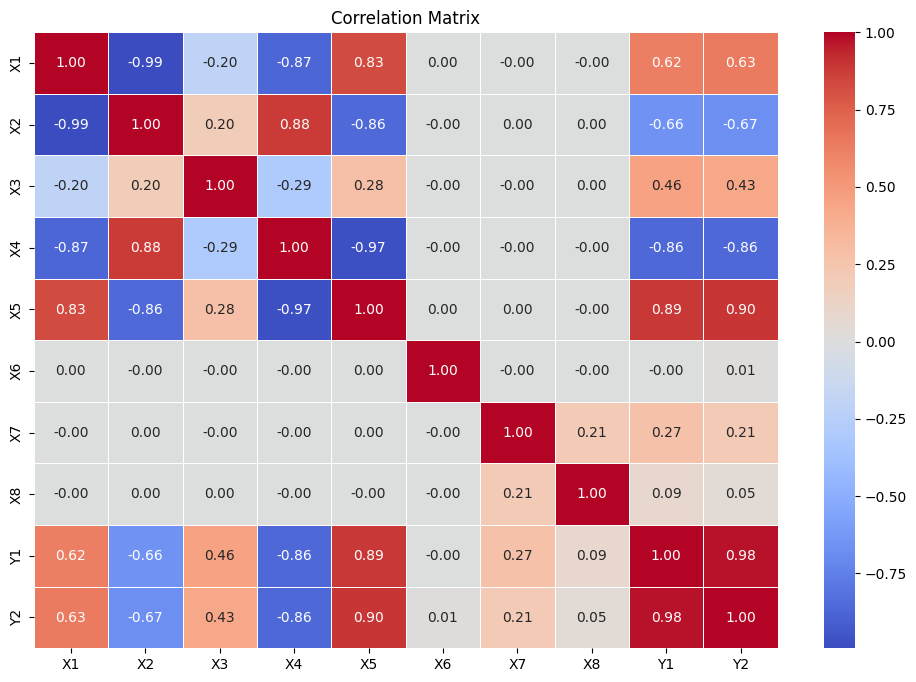

In [10]:
# 3. Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# 4. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.0100

In [12]:
# 5. Skewness and Kurtosis
print("\nSkewness of each feature:")
print(data.skew())
print("\nKurtosis of each feature:")
print(data.kurtosis())


Skewness of each feature:
X1    0.495513
X2   -0.125131
X3    0.533417
X4   -0.162764
X5    0.000000
X6    0.000000
X7   -0.060254
X8   -0.088689
Y1    0.360446
Y2    0.395992
dtype: float64

Kurtosis of each feature:
X1   -0.706568
X2   -1.059454
X3    0.116593
X4   -1.776947
X5   -2.005229
X6   -1.361042
X7   -1.327629
X8   -1.148709
Y1   -1.245569
Y2   -1.147190
dtype: float64


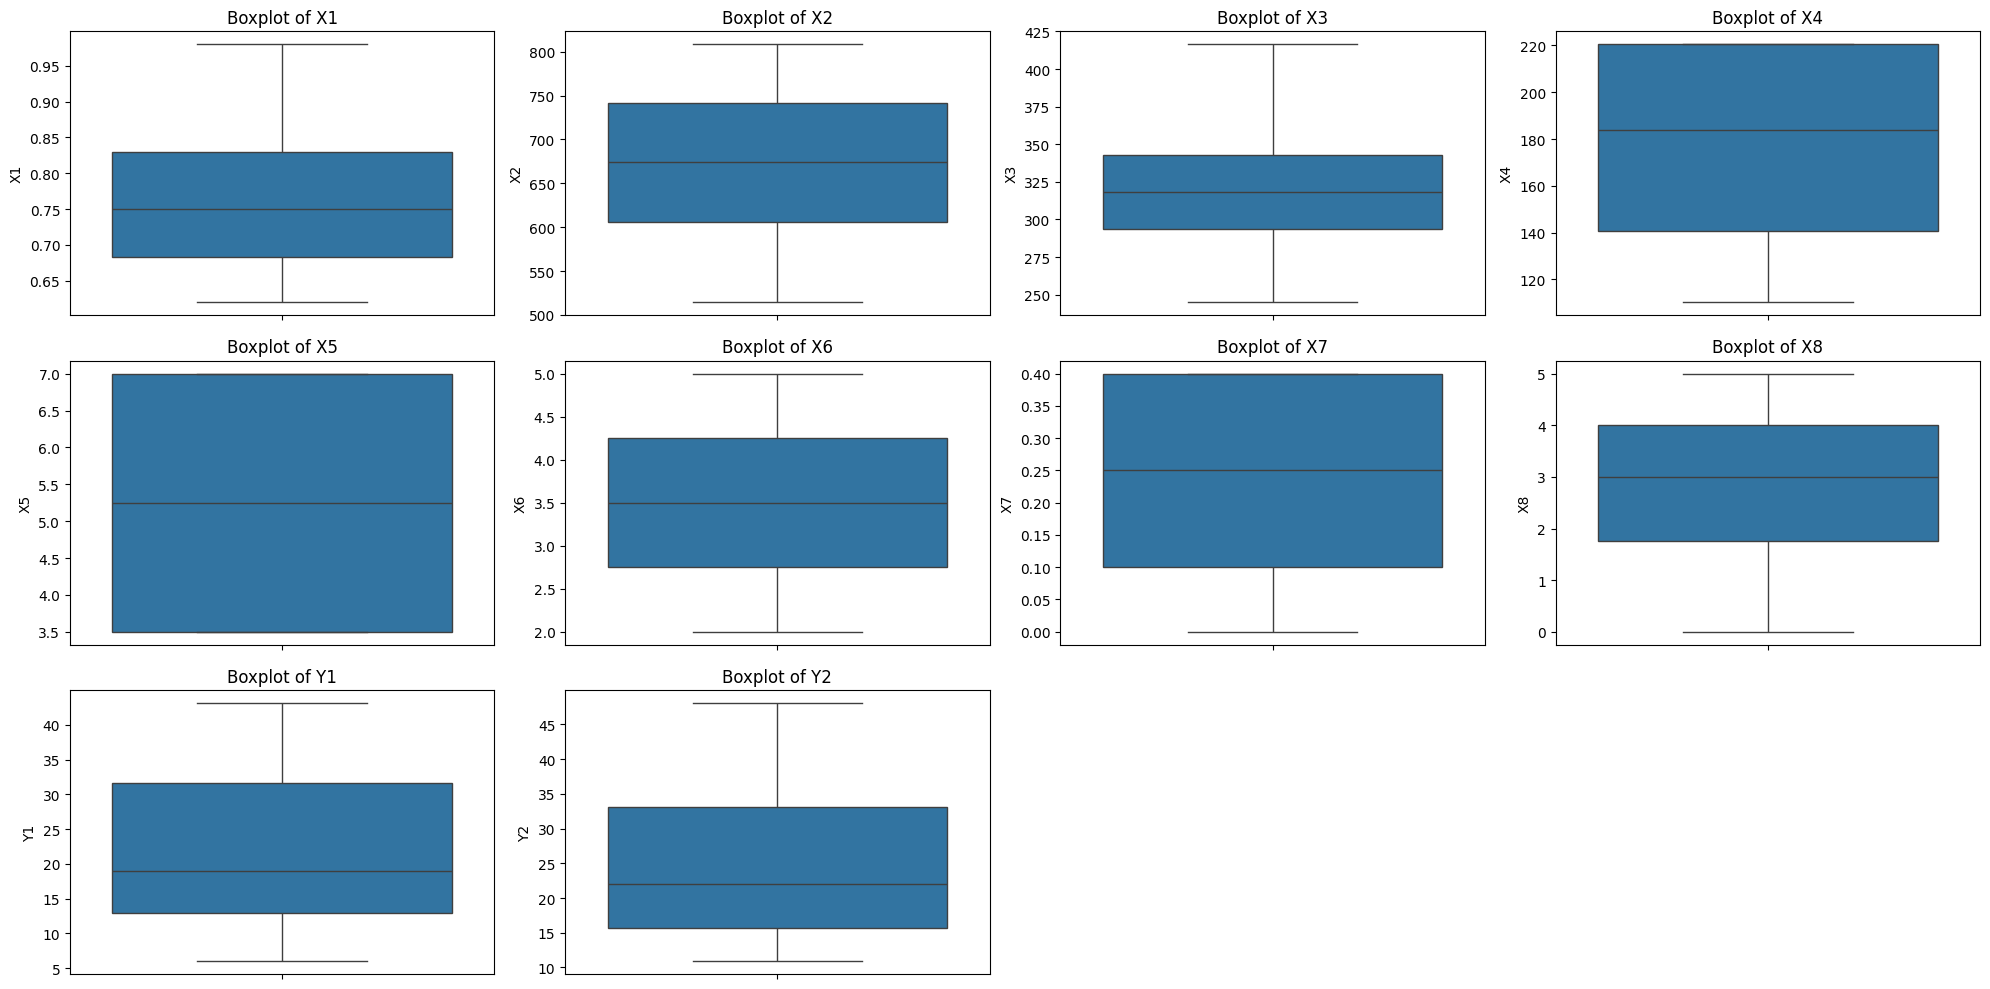

In [13]:
# 6. Boxplots for Outlier Detection
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

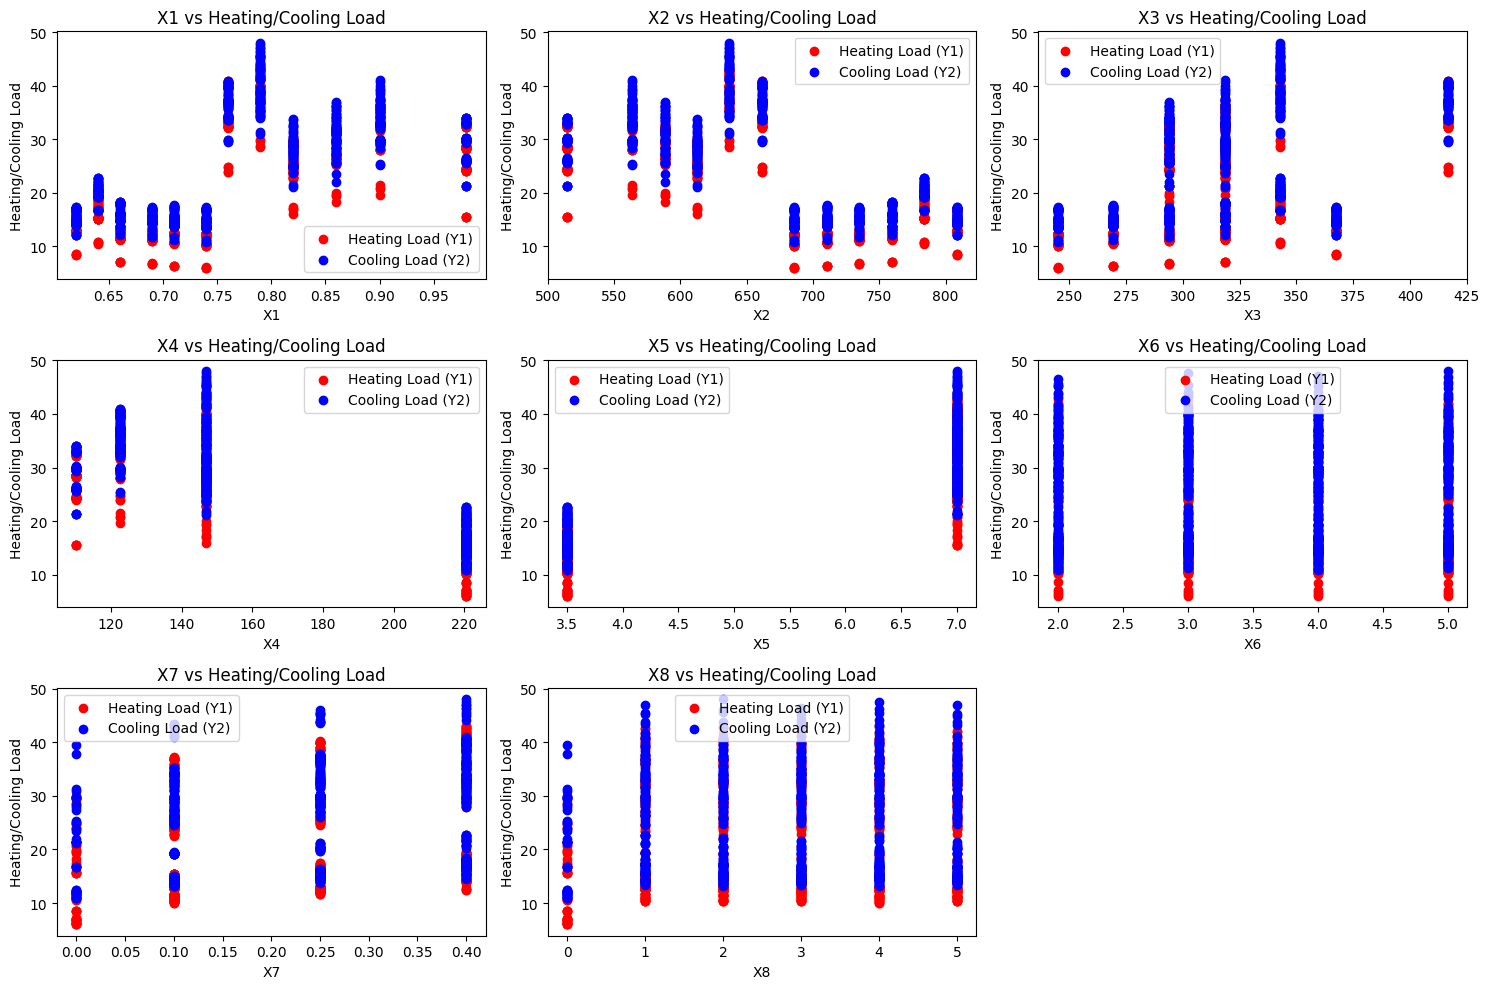

In [14]:
# 7. Feature-Target Relationships (Scatter plots)
plt.figure(figsize=(15, 10))
for col in data.columns[:-2]:  # Exclude the target variables
    plt.subplot(3, 3, list(data.columns).index(col) + 1)
    plt.scatter(data[col], data['Y1'], color='r')
    plt.scatter(data[col], data['Y2'], color='b')
    plt.xlabel(col)
    plt.ylabel('Heating/Cooling Load')
    plt.legend(['Heating Load (Y1)', 'Cooling Load (Y2)'])
    plt.title(f'{col} vs Heating/Cooling Load')
plt.tight_layout()
plt.show()

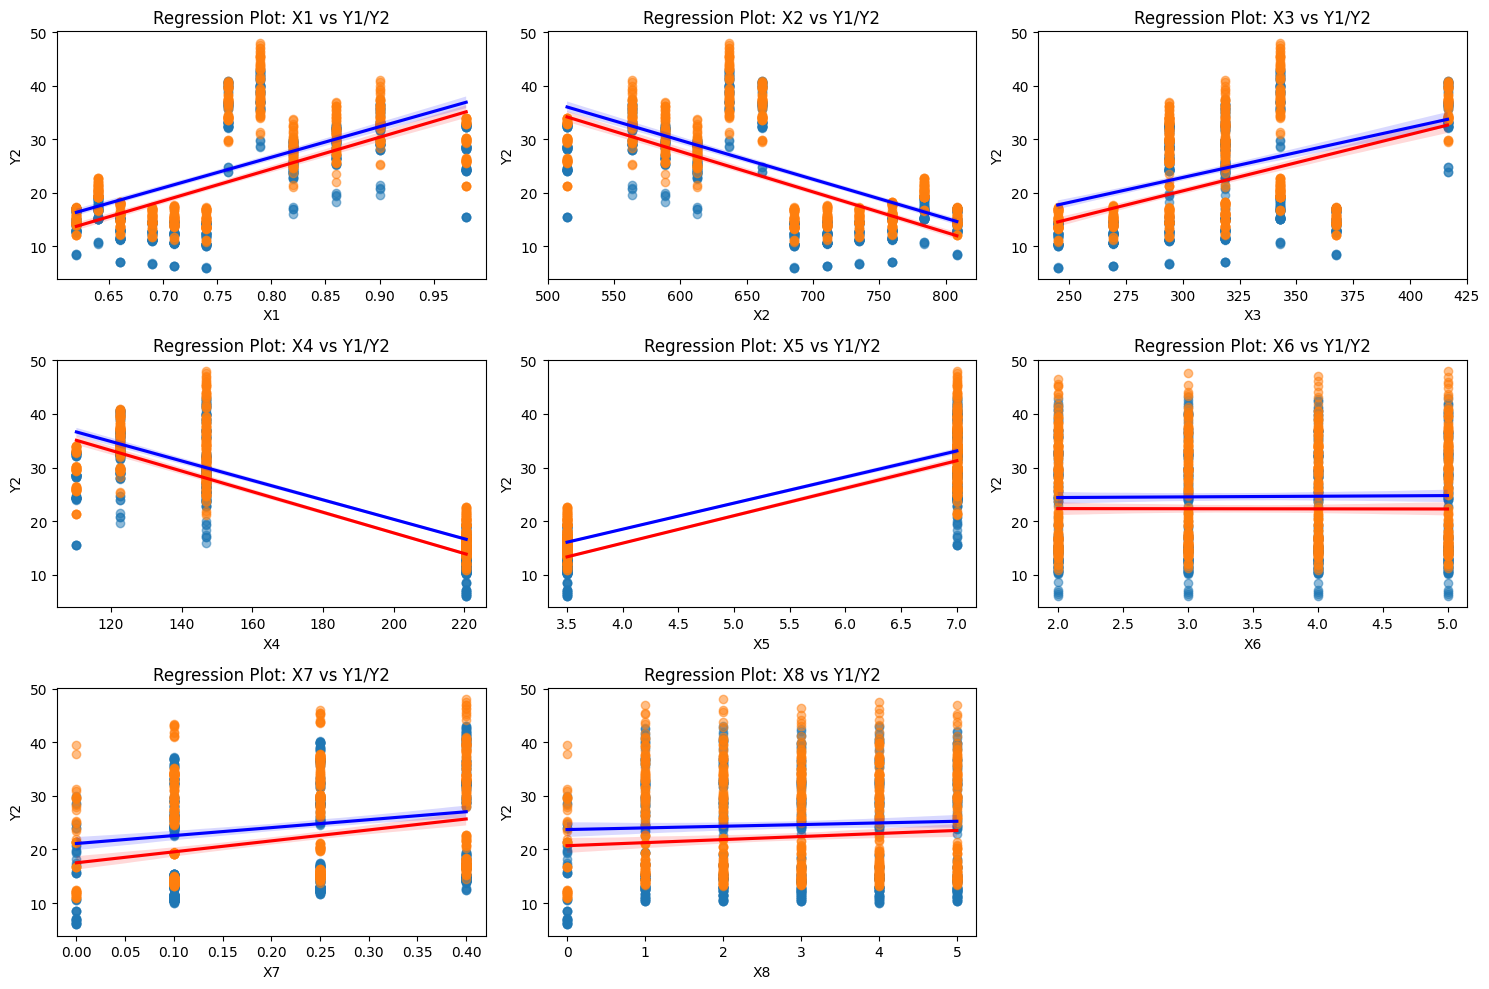

In [15]:
# 8. Regression Plots for Feature-Target Relationships
plt.figure(figsize=(15, 10))
for col in data.columns[:-2]:  # Exclude the target variables Y1 and Y2
    plt.subplot(3, 3, list(data.columns).index(col) + 1)
    sns.regplot(x=data[col], y=data['Y1'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    sns.regplot(x=data[col], y=data['Y2'], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
    plt.title(f'Regression Plot: {col} vs Y1/Y2')
plt.tight_layout()
plt.show()

In [16]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
data.fillna(data.mean(), inplace=True)

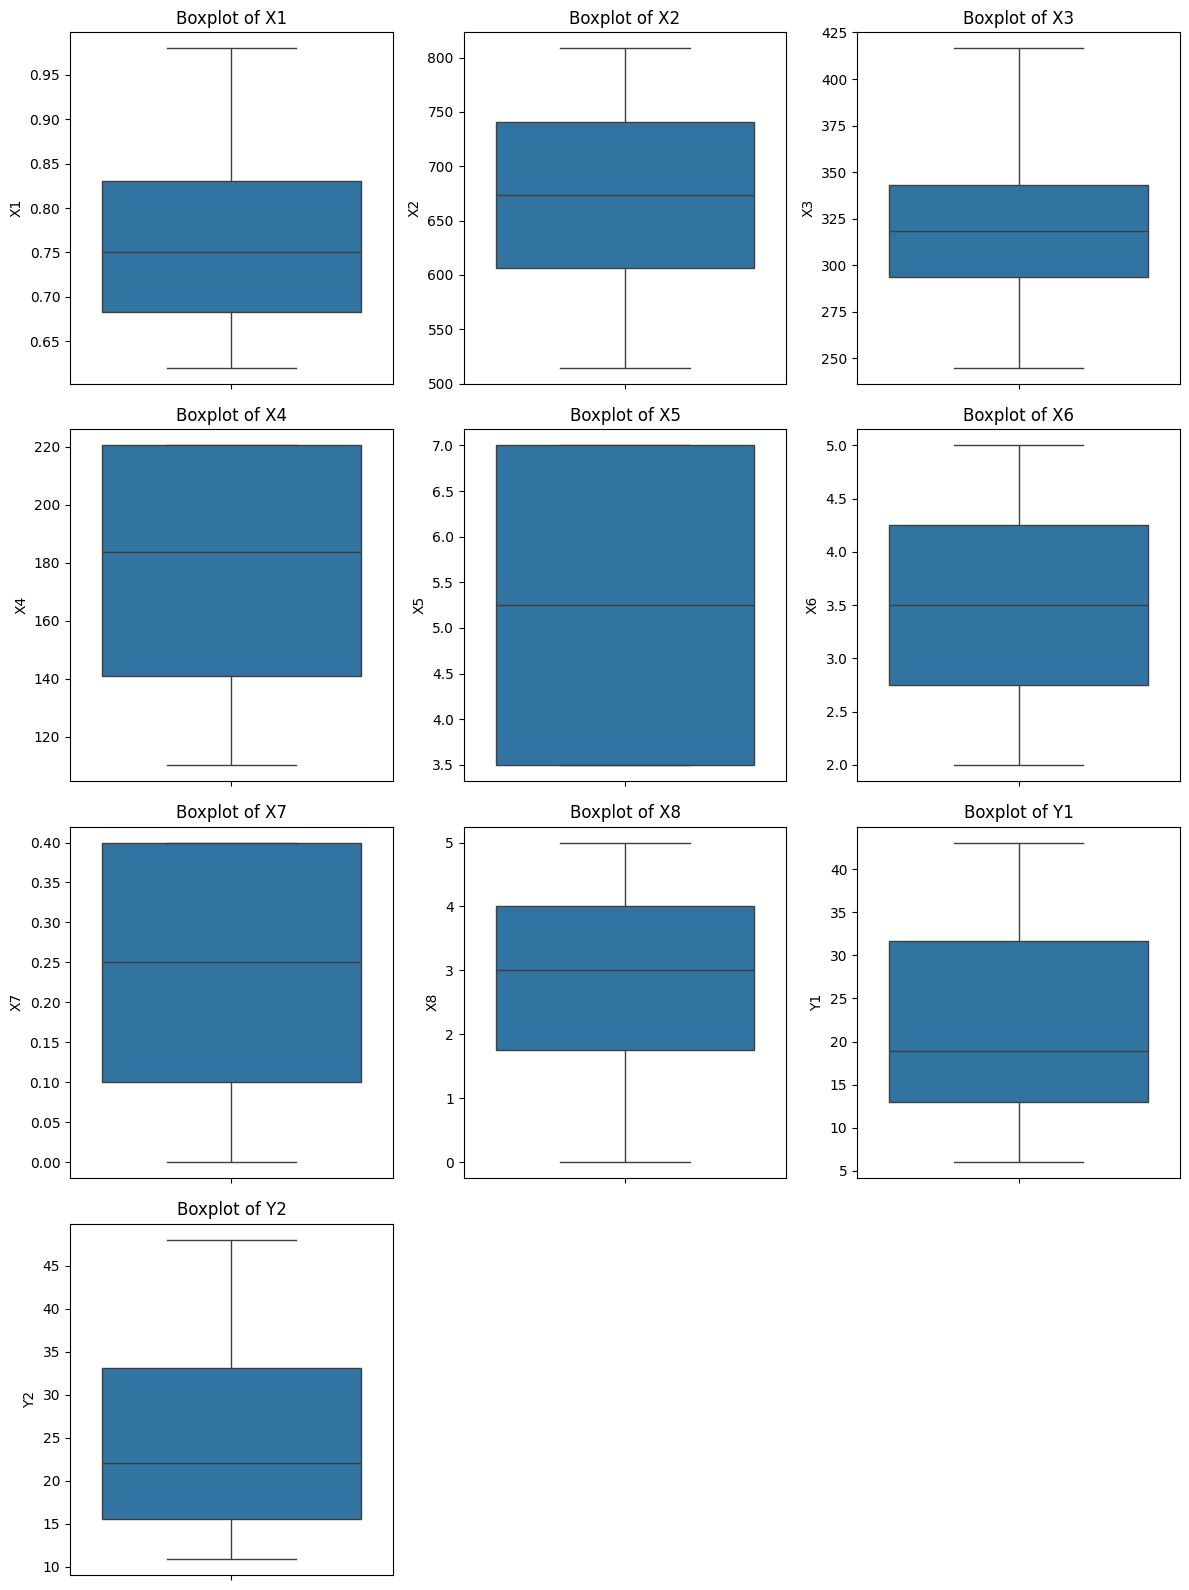

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns for grid layout
num_cols = 3
num_features = len(data.select_dtypes(include='number').columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create a grid of boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten to easily index subplots

# Plot each numerical feature in its own boxplot
for i, col in enumerate(data.select_dtypes(include='number').columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots if features don't fit perfectly into the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to all columns
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)


In [19]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [20]:
print("Sample of preprocessed data:\n", data.head())
print("Summary statistics:\n", data.describe())

Sample of preprocessed data:
      X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Summary statistics:
                X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to all columns
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)


In [22]:
# Check the columns in the dataframe
print(data.columns)


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [23]:
# Rename columns to more descriptive names
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


In [24]:
# Encoding 'Orientation' and 'Glazing_Area_Distribution' as one-hot variables
data = pd.get_dummies(data, columns=['Orientation', 'Glazing_Area_Distribution'], drop_first=True)


In [25]:
from sklearn.preprocessing import StandardScaler # Importing the necessary class


scaler = StandardScaler()
data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']] = \
    scaler.fit_transform(data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']])

In [26]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])
y = data[['Heating_Load', 'Cooling_Load']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and testing data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training and testing data shapes: (537, 14) (231, 14) (537, 2) (231, 2)


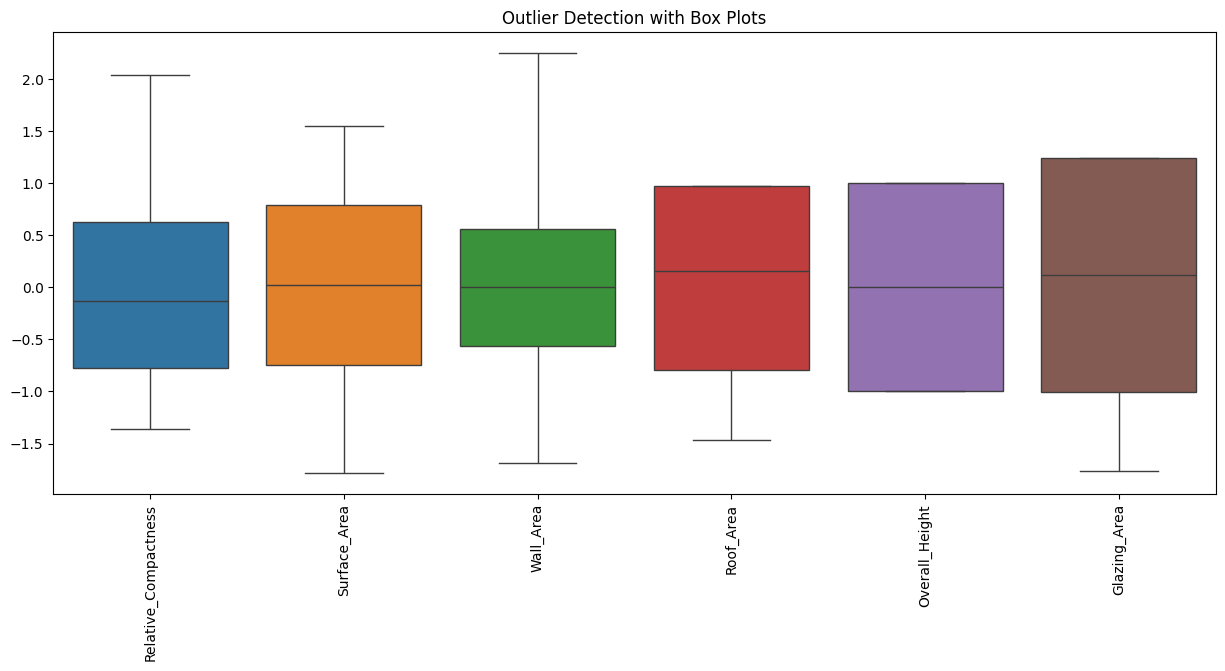

In [27]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']])
plt.xticks(rotation=90)
plt.title('Outlier Detection with Box Plots')
plt.show()

In [28]:
import numpy as np
# Detecting and optionally removing outliers with Z-scores
from scipy.stats import zscore

# Calculate z-scores
z_scores = np.abs(zscore(data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

# Remove outliers if needed
# data = data[~outliers]


Number of outliers detected: 0


In [29]:
# Example: Interaction terms between Relative Compactness and Surface Area
data['Compactness_Surface_Interaction'] = data['Relative_Compactness'] * data['Surface_Area']

# Example: Polynomial features for Overall Height
data['Overall_Height_Squared'] = data['Overall_Height'] ** 2


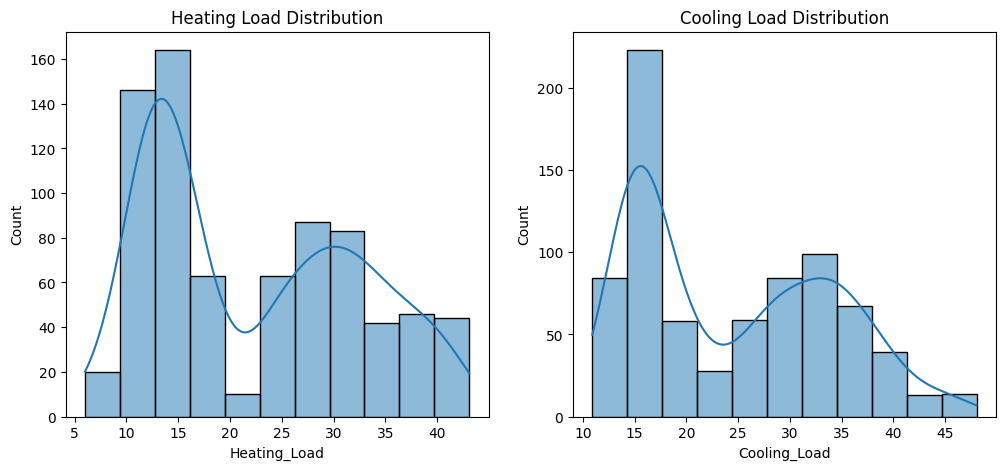

In [30]:
# Check distribution of target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Heating_Load'], kde=True)
plt.title('Heating Load Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data['Cooling_Load'], kde=True)
plt.title('Cooling Load Distribution')
plt.show()

# If skewed, apply log transformation (uncomment to use)
# data['Heating_Load'] = np.log1p(data['Heating_Load'])
# data['Cooling_Load'] = np.log1p(data['Cooling_Load'])


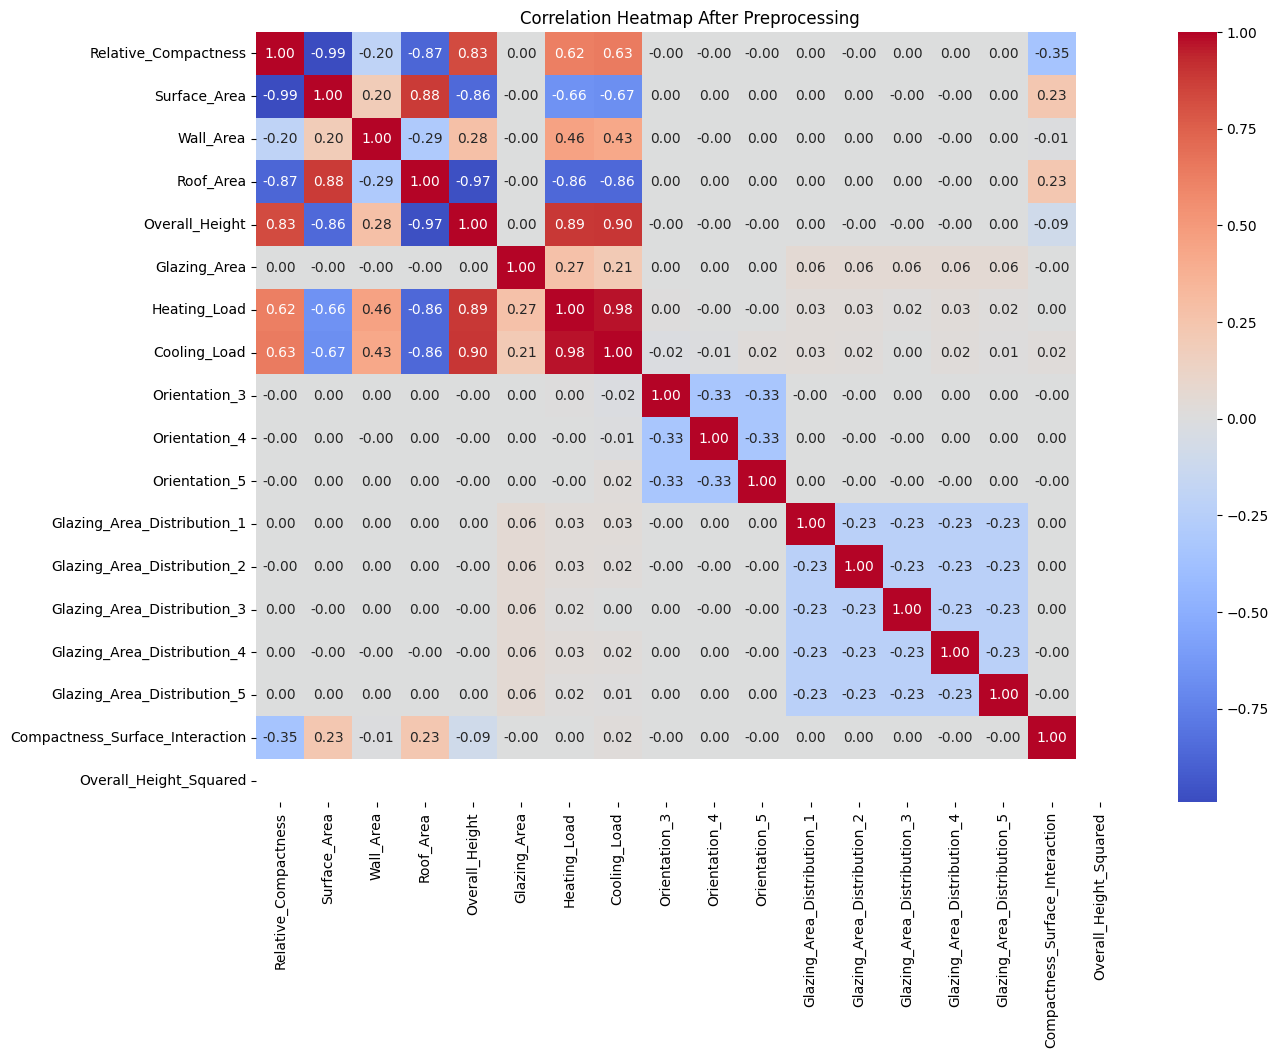

In [31]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Preprocessing")
plt.show()


In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])
y = data['Heating_Load']

# Initialize model and RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", list(selected_features))

# Rank of all features
for feature, rank in zip(X.columns, rfe.ranking_):
    print(f"{feature}: Rank {rank}")


Selected Features using RFE: ['Overall_Height', 'Glazing_Area_Distribution_1', 'Glazing_Area_Distribution_2', 'Glazing_Area_Distribution_3', 'Glazing_Area_Distribution_4']
Relative_Compactness: Rank 4
Surface_Area: Rank 5
Wall_Area: Rank 6
Roof_Area: Rank 3
Overall_Height: Rank 1
Glazing_Area: Rank 8
Orientation_3: Rank 9
Orientation_4: Rank 10
Orientation_5: Rank 11
Glazing_Area_Distribution_1: Rank 1
Glazing_Area_Distribution_2: Rank 1
Glazing_Area_Distribution_3: Rank 1
Glazing_Area_Distribution_4: Rank 1
Glazing_Area_Distribution_5: Rank 2
Compactness_Surface_Interaction: Rank 7
Overall_Height_Squared: Rank 12


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])
y = data['Cooling_Load']

# Initialize model and RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", list(selected_features))

# Rank of all features
for feature, rank in zip(X.columns, rfe.ranking_):
    print(f"{feature}: Rank {rank}")


Selected Features using RFE: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']
Relative_Compactness: Rank 1
Surface_Area: Rank 1
Wall_Area: Rank 1
Roof_Area: Rank 1
Overall_Height: Rank 1
Glazing_Area: Rank 3
Orientation_3: Rank 10
Orientation_4: Rank 11
Orientation_5: Rank 9
Glazing_Area_Distribution_1: Rank 4
Glazing_Area_Distribution_2: Rank 6
Glazing_Area_Distribution_3: Rank 8
Glazing_Area_Distribution_4: Rank 5
Glazing_Area_Distribution_5: Rank 7
Compactness_Surface_Interaction: Rank 2
Overall_Height_Squared: Rank 12


Feature Importance:
 Relative_Compactness               0.421033
Overall_Height                     0.264964
Surface_Area                       0.116276
Roof_Area                          0.059156
Glazing_Area                       0.051285
Wall_Area                          0.032441
Compactness_Surface_Interaction    0.029421
Orientation_4                      0.004495
Orientation_5                      0.003871
Orientation_3                      0.003779
Glazing_Area_Distribution_4        0.003711
Glazing_Area_Distribution_3        0.003019
Glazing_Area_Distribution_5        0.002862
Glazing_Area_Distribution_1        0.001950
Glazing_Area_Distribution_2        0.001737
Overall_Height_Squared             0.000000
dtype: float64


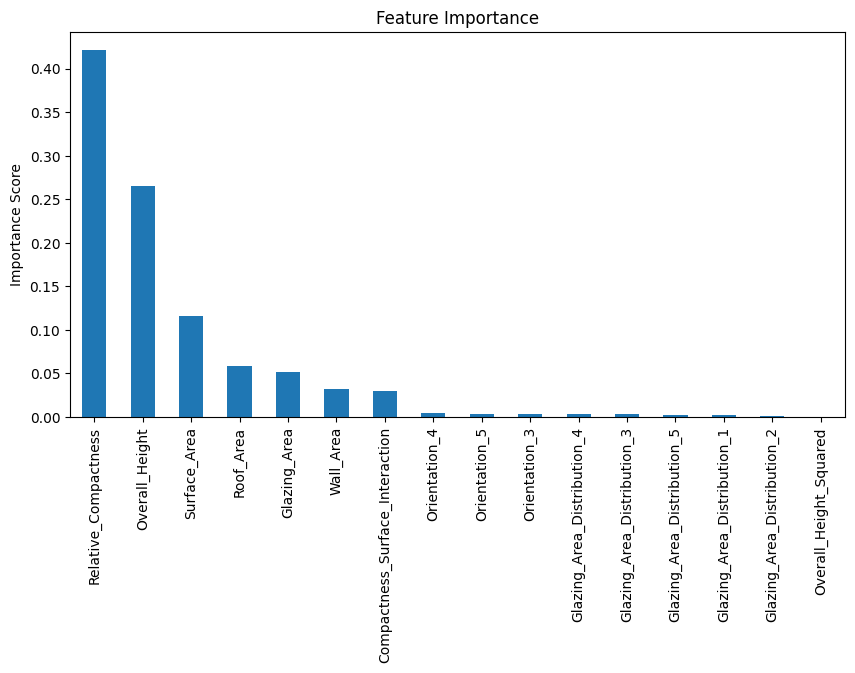

In [34]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display and visualize feature importance
print("Feature Importance:\n", feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 5))
feature_importances.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()


Mutual Information Scores:
 Surface_Area                       1.416061
Relative_Compactness               1.415072
Compactness_Surface_Interaction    1.389407
Roof_Area                          0.874506
Wall_Area                          0.865268
Glazing_Area                       0.729559
Overall_Height                     0.681512
Glazing_Area_Distribution_1        0.049967
Glazing_Area_Distribution_5        0.022269
Orientation_3                      0.007727
Glazing_Area_Distribution_4        0.004022
Orientation_4                      0.000000
Glazing_Area_Distribution_3        0.000000
Glazing_Area_Distribution_2        0.000000
Orientation_5                      0.000000
Overall_Height_Squared             0.000000
dtype: float64


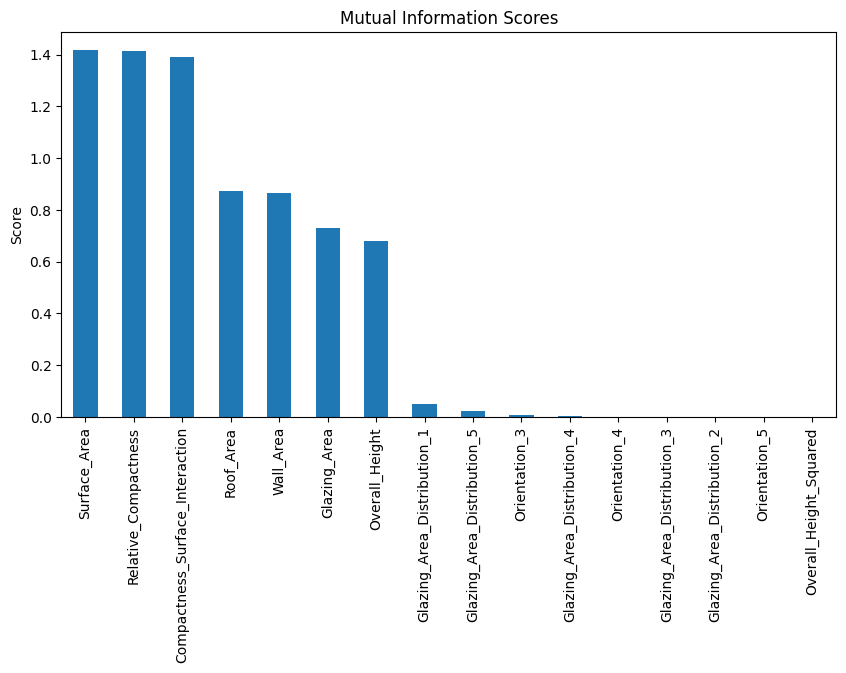

In [35]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information scores
mutual_info = mutual_info_regression(X, y, random_state=42)
mutual_info = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Display and plot mutual information scores
print("Mutual Information Scores:\n", mutual_info)

plt.figure(figsize=(10, 5))
mutual_info.plot(kind='bar', title='Mutual Information Scores')
plt.ylabel('Score')
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [37]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=500)
}


In [38]:
# Define scoring metrics
scoring_metrics = {
    "MAE": make_scorer(mean_absolute_error),
    "MSE": make_scorer(mean_squared_error),
    "R2": make_scorer(r2_score)
}


In [39]:
from sklearn.model_selection import cross_val_score

# Features and target
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])  # Features
y = data['Heating_Load']

# Store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    results[model_name] = {}
    for metric_name, scorer in scoring_metrics.items():
        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        results[model_name][metric_name] = (scores.mean(), scores.std())

# Display results
import pandas as pd
results_df = pd.DataFrame({
    metric: {model: results[model][metric][0] for model in results} for metric in scoring_metrics
}).T

print("Model Performance Comparison:")
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model Performance Comparison:
     Linear Regression  Decision Tree  Random Forest  Gradient Boosting  \
MAE           2.133933       0.870777       0.795417           0.746511   
MSE           8.836549       3.036283       2.868063           2.800702   
R2            0.904912       0.963581       0.965265           0.965903   

          SVR  Neural Network  
MAE  1.882930        1.569642  
MSE  8.381829        5.606517  
R2   0.910413        0.941552  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.model_selection import cross_val_score

# Features and target
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])  # Features
y = data['Cooling_Load']

# Store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    results[model_name] = {}
    for metric_name, scorer in scoring_metrics.items():
        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        results[model_name][metric_name] = (scores.mean(), scores.std())

# Display results
import pandas as pd
results_df = pd.DataFrame({
    metric: {model: results[model][metric][0] for model in results} for metric in scoring_metrics
}).T

print("Model Performance Comparison:")
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model Performance Comparison:
     Linear Regression  Decision Tree  Random Forest  Gradient Boosting  \
MAE           2.313397       1.537196       1.288149           1.213980   
MSE          10.118997       6.223099       3.892854           3.215929   
R2            0.883860       0.927542       0.954021           0.961906   

          SVR  Neural Network  
MAE  2.030214        2.096217  
MSE  9.962292        9.189082  
R2   0.886375        0.893619  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


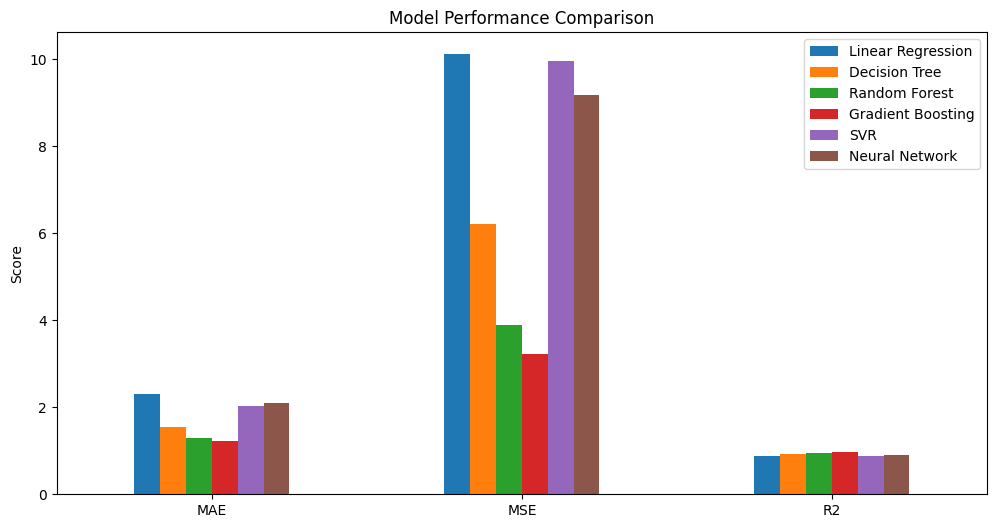

In [41]:
# Plotting the comparison
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


In [42]:
import numpy as np
results_df.loc['RMSE'] = np.sqrt(results_df.loc['MSE'])


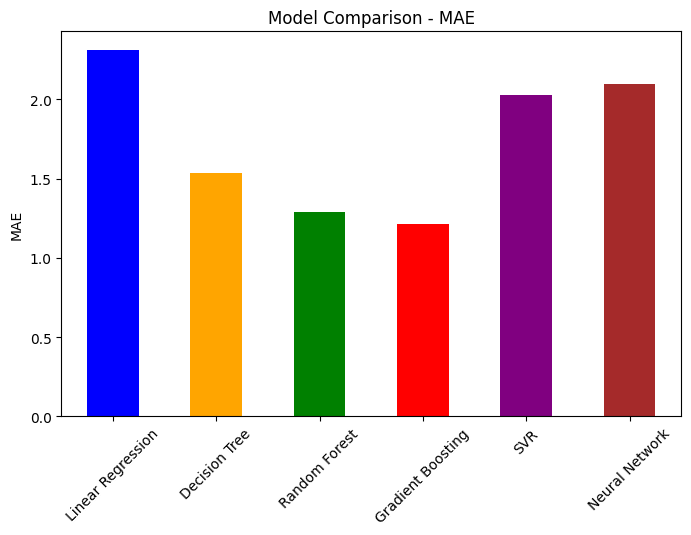

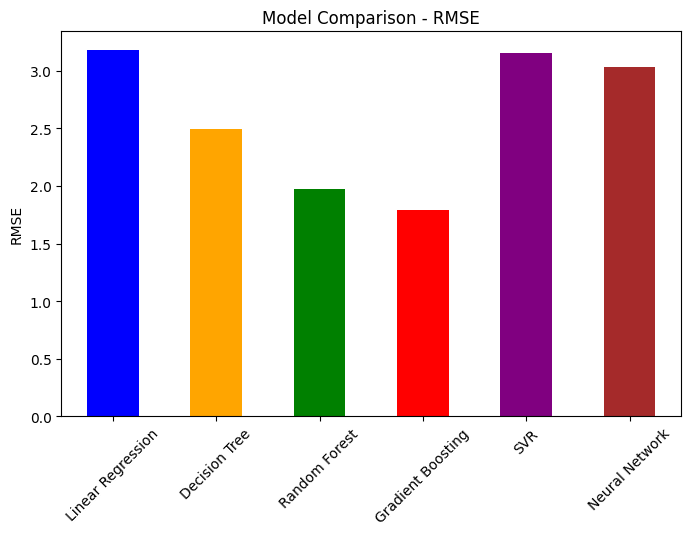

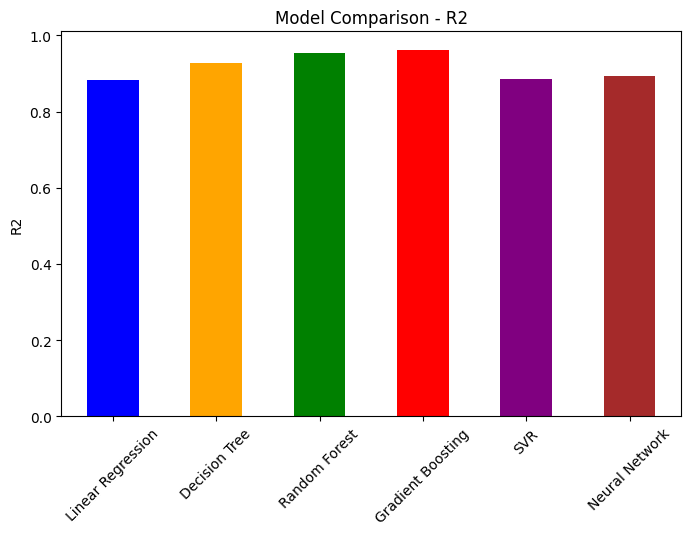

In [43]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'R2']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    results_df.loc[metric].plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


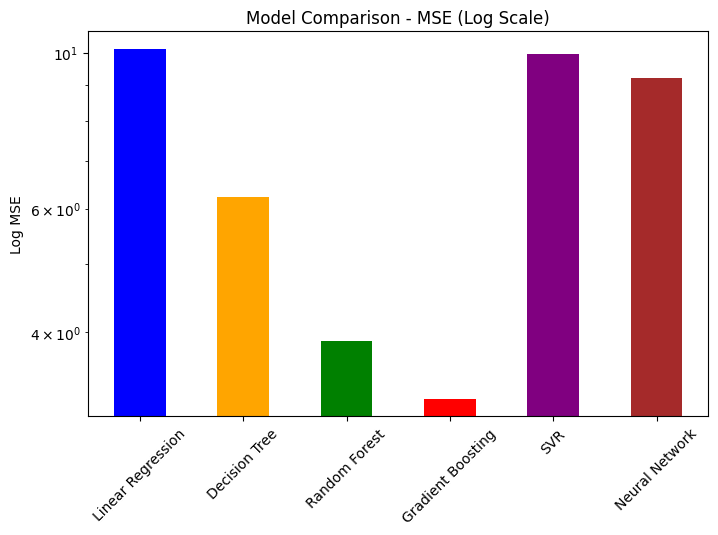

In [44]:
plt.figure(figsize=(8, 5))
plt.yscale('log')  # Logarithmic scale for better visualization
results_df.loc['MSE'].plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Model Comparison - MSE (Log Scale)')
plt.ylabel('Log MSE')
plt.xticks(rotation=45)
plt.show()
